<h1>Computer practical</h1>

# Part 1: Monte Carlo simulations, Empirical distributions
## 1 Short overview of Python
### 1.1 How to run it
First things first: how to run it. 
Click with mouse within a grey cell you want to run and either click Run button at the top of the notebook or press ctrl + enter. Try it in the cell below. Observe that function "print" produces an output just below the cell:

In [2]:
print("Welcome to the computer practical of Quantitative Finance course!")

Welcome to the computer practical of Quantitative Finance course!


### 1.2 Packages
Let us import a few packages that will be used in the calculations: 
1. _Numpy_ is the package for numerical calculations with matrices and vectors. 
2. _Stats_ from _Scipy_ is used for some statistics. 
3. _Matplotlib_ is a package to plot graphs. 

Once the packages are loaded, they stay within the session and there is no need to reload them again. 

When calling a function from a package, the package name should be added to the function name like "np.array()" or "plt.plot()". Everything after symbol '#' is a comment and not executed.

Click in the cell below and run it. No visible output will be produced, but the cell gets a number, like for example "In [3]:".

In [3]:
import numpy as np  # Load Numpy package and call it 'np'
from scipy import stats  # for some statistics
import matplotlib.pyplot as plt # Load Pyplot as 'plt'
import scipy

### 1.3 Working with Numpy arrays
Arrays are useful contaners for data. They can be created in multiple ways.

Array can be specified directly:

In [4]:
v = np.array([5,7])
print('v = ',v)

v =  [5 7]


Linear array can be specified as equidistant points between two bounds, 2.0 and 3.0, with a fixed step of 0.1:

In [5]:
a = np.arange(2, 3, 0.1)
print(a)

[2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9]


Array can be specified as equidistant points between two points with a fixed number of points:

In [6]:
a = np.linspace(2, 3, 11)
print(a)

[2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]


Sometimes, one needs a part of an array. Suppose we need elements starting from the second one till the half of the array. Remember that Python indexes arrays starting from zero. Also when we take a half we want to round to the integer, so we use a.size//2 rather than a.size/2.

In [7]:
a1 = a[1:a.size//2]
print(a1)

[2.1 2.2 2.3 2.4]


Let us create a two-dimensional array:

In [8]:
A = np.array([[1, 2],[3,4]])
print(A)

[[1 2]
 [3 4]]


An array can be easily transposed:

In [9]:
B = A.T
print(B)

[[1 3]
 [2 4]]


Standard arrays, like array of zeros, can be created much easier. Note that the parameters are given as a single argument in the form of tuple, "(2,3)".

In [10]:
a = np.zeros((2,3))
b = np.ones((3,2))
print(a)
print(b)

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]


Matrix-vector multiplication can be done in the following way. Note that "A" and "v" are defined above. Run those cells first to get the arrays initialized.

In [11]:
e = A @ v
print(e)

[19 43]


Matrix-matrix multiplication is done in the same way:

In [12]:
a = A @ A
print(a)

[[ 7 10]
 [15 22]]


Element by element multiplication can be done as follows:

In [13]:
a = A * A
print(a)

[[ 1  4]
 [ 9 16]]


Matrix can be inverted:

In [14]:
a = np.linalg.inv(A)
print(a)

[[-2.   1. ]
 [ 1.5 -0.5]]


Solution $x$ to a system of linear equations 
$$ \hat{A}\cdot \vec{x} = \vec{e}
$$
can be found in the following way:

In [15]:
x = np.linalg.solve(A,e)
print(x)

[5. 7.]


### 1.4 Plotting graphs
The results can be visualized with plots.

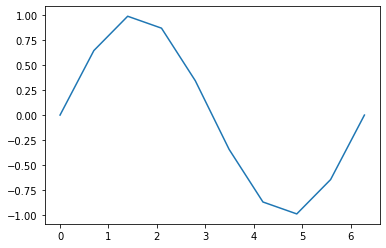

In [16]:
x = np.linspace(0,2*np.pi,10) # Equidistant grid from zero to 2*pi
y = np.sin(x)  # Compute sinus
plt.plot(x,y)  # Create a plot
plt.show()     # Make it to plot now

### 1.5 Cholesky decomposition
To practice a bit with matrices let us look at Cholesky decomposition, which will be used later to correlate random variables. Given a symmetric positive definite matrix $C$, Cholesky decomposition factorizes it into a product of upper triangular matrix
$U$ and its transpose lower triangular matrix $L=U^T$
$$ C = L\cdot U.$$
***
### Exercise 1 (Cholesky decomposition)
> Define in the cell below correlation matrix $C$
$$C = \begin{bmatrix}
&1 & 0.4 & 0.3\\
&0.4 & 1 & 0.5\\
&0.3 & 0.5 & 1
\end{bmatrix}
$$
by filling the numpy array below

In [17]:
C = np.array([[1, 0.4, 0.3],[0.4, 1, 0.5],[0.3, 0.5, 1]])
print(C)

[[1.  0.4 0.3]
 [0.4 1.  0.5]
 [0.3 0.5 1. ]]


> Compute matrix $L$ using Cholesky decomposition as

In [18]:
L = np.linalg.cholesky(C)
print(L)

[[1.         0.         0.        ]
 [0.4        0.91651514 0.        ]
 [0.3        0.41461399 0.85912469]]


> Show that equation $C = L \cdot L^T$ is satisfied

In [19]:
C1 = L @ L.T
print(C1)

[[1.  0.4 0.3]
 [0.4 1.  0.5]
 [0.3 0.5 1. ]]


## 2 Random numbers generation
### 2.1 Random numbers in one dimension
We will use normally distributed random numbers a lot. The function to generate a matrix $n\times m$ of independent random numbers is

Z = np.random.normal(size=$N$) 

This function generate $N$ pseudo-random numbers of standard normal distribution $Z\sim\mathcal{N}(0,1)$, i.e. with mean 0.0 and variance 1.0.
***
### Exercise 2 (Random numbers)
> Genrate vector $Z$ of normal  random numbers of size $1 \times N$, where $N = 10,000$. Plot this series.

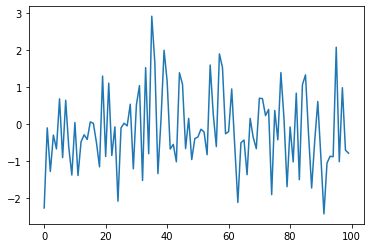

In [20]:
N = 10000         # How many random numbers to generate
Z = np.random.normal(size=N)     # Generation of random numbers from standard normal distribution
plt.plot(Z[0:-1:100])
plt.show()

Let us do some statistics. Compute mean, standard deviation, excess kurtosis, and skewness of the series, see that these are
indeed standard normal parameters:

In [21]:
mean_Z = np.mean(Z)   # Check that mean is zero
std_Z = np.std(Z)     # Check that standard deviation is one
exkur_Z = scipy.stats.kurtosis(Z) # Excess kurtosis, normal distribution has excess kurtosis = 0.
skew_Z = scipy.stats.skew(Z)
print("mean =",mean_Z,"std =",std_Z,"excess kurtosis =", exkur_Z,"skew =",skew_Z)

mean = -0.020250819166793003 std = 0.9980745324348921 excess kurtosis = 0.0075519493574485175 skew = 0.02205028645226255


#### Antithetic sampling
Observe that np.mean($Z$) is close but not quite equal to zero due to the finite sample. The deviation will be even higher if we take a half of vector $Z$.

In [22]:
ZH = Z[0:Z.size//2]
mean_ZH = np.mean(ZH)
print(mean_ZH)

-0.021712404788891415


> Combine $ZH$ with itself with the _negative_ sign and compute the mean of the combined vector.

In [23]:
ZA = np.r_[ZH,-ZH] # antithetic sampling
mean_ZA = np.mean(ZA) # Compute the mean of ZH here
print(mean_ZA)

1.4210854715202004e-18


This so called ‘antithetic sampling’ is a legitimate technique to reduce the variance in random number simulations with symmetric PDF. Why does this trick ‘magically’ make the mean exactly zero? Would this ‘magic’ work for any antisymmetric component of the averaging function, like $x^3$ for example?
#### Distributions
Let us investigate the distribution of the generated numbers. Look at the code below. 
- Function np.histogram($Z$, 100) sorts elements in $Z$ into 100 equally spaced bins. $y$ is the number of counts in bins,
while $x$ are the bin boundaries. There are 101 boundaries of 100 bins, that is why the first element is excluded: $x[1:]$.  
- Function stats.norm.pdf($x$) computes PDF of the standard normal distribution.
- Function plt.plot(x,y) draws the graph of y as a function of x. Function plt.show() combines both plots in one graph and display it.

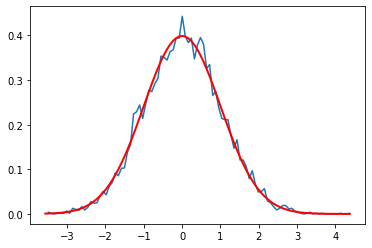

In [29]:
y, x = np.histogram(Z, 100)
a = N*(x[1]-x[0])
plt.plot(x[1:],y/a)
yn = stats.norm.pdf(x)
plt.plot(x, yn, linewidth=2, color='r')
plt.show()


Observe that functions $y/a$ and $yn$ do not coinside. The empirical distribution (blue line) is way to high compared to the standard normal PDF (red line). The empirical distribution needs to be scaled to represent a real distribution.

> Modify the code above such that the empirical distribution becomes comparable with the standard normal distribution. You can do it in the cell above and run it again.

> _Hint: redefine variable $a$ in terms of the size of vector $Z$ (N=Z.size) and the elements of $x$._

In practice you need to generate vectors with non-zero mean and non-unit variance. 
> Use the very same vector $Z$, computed in the previous step, to obtain another vector $Z1$ with mean 3 and standard deviation 2. Compare to the corresponding normal pdf (do not forget to rescale y).

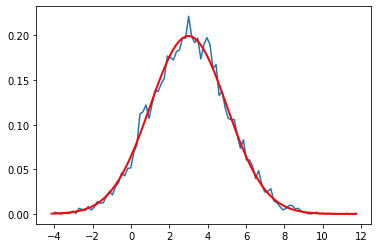

In [30]:
Z1 = 3 + Z*2
y, x =  np.histogram(Z1, 100)
a = N * (x[1] - x[0])
plt.plot(x[1:],y/a)
yn = stats.norm.pdf(x,loc=3,scale=2)
plt.plot(x, yn, linewidth=2, color='r')
plt.show()

## 2.2 Random numbers in multiple dimensions
Usually, we need to generate random numbers for two or more correlated random variables. We use the fact that the sum _normal_ random variables is again a normal random variable.

Suppose we have realizations of three _independent_ random variables $X$, $Y$ , and $Z$, all with zero
mean. We can generate three correlated random variables, $\tilde{X}$, $\tilde{Y}$, and $\tilde{Z}$
by making linear combinations of vectors $X$, $Y$ , and $Z$. Or in matrix form, we multiply matrix $[XYZ]$, which consists
of three columns $X$, $Y$, and $Z$,
$$\left[X Y Z\right] = 
	\begin{bmatrix}
	x_1 & y_1 & z_1\\
	x_2 & y_2 & z_2\\
	\vdots & \vdots & \vdots\\
	x_N & y_N & z_N
	\end{bmatrix}
$$
with some  $3\times 3$ loading matrix $U$:
$$
\left[\tilde{X} \tilde{Y} \tilde{Z}\right]  = \left[X Y Z\right] \cdot U.
$$
It turns out that in order to have a correlation matrix $C$ between $\tilde{X}$, $\tilde{Y}$, and $\tilde{Z}$, the corresponding matrix $U$ is obtained by the Cholesky decomposition $C = U^T \cdot U$.

It can be shown theoretically that the random variables produced in this way have indeed correlation matrix $C$. We will do it empirically.

We can do these calculations in two ways:
1. By programming the standard formulas. Suppose that $X = \left\{x_1,x_2,...,x_N \right\}$ and 
$Y = \left\{y_1,y_2,...,y_N \right\}$ are series of observations for two normal random variables with mean zero. We can estimate the covariance and correlation between them in the following way
$$\begin{align*}
	\text{cov}[X,Y] & = \mathbb{E}[X\cdot Y] \approx \frac{1}{N-1}\sum_{i=1}^N x_i y_i\\
	\rho_{XY} & = \frac{\mathbb{E}[X\cdot Y]}{\sqrt{\mathbb{E}[X^2]\mathbb{E}[Y^2]}} 
		\approx \frac{\sum_{i=1}^N x_i y_i}{\sqrt{\sum_{i=1}^N x_i^2 \cdot \sum_{i=1}^N y_i^2}}
\end{align*}
$$
2. By using the corresponding Numpy functions.
***
### Exercise 3 (Independent normal random variables)
Let us generate realizations for two independent normal variables. Use function np.random.normal(size=($M$,$N$)) to generate a matrix $M\times N$ of random numbers. 
> Generate a $2\times N$ matrix $Z$ of random numbers. Compute a covariance between two rows of the generated matrix using the equations above and compare to the Numpy functions np.cov(Z) and np.corrcoef(Z).

In [31]:
N = 10000
Z = np.random.normal(size=(2,N))     # Generation of random numbers from standard normal distribution
cov_z = (Z[0,:] @ Z[1,:])/(N-1)
corr_z = cov_z/np.std(Z[0,:])/np.std(Z[1,:])
cov_Z = np.cov(Z) 
corr_Z = np.corrcoef(Z)
print(cov_z)
print(corr_z)
print(cov_Z)
print(corr_Z)
print(np.std(Z[0,:]))

0.015119980465815494
0.0149720697553994
[[0.9977942  0.01516822]
 [0.01516822 1.02231484]]
[[1.         0.01501833]
 [0.01501833 1.        ]]
0.9988465467144437


> Plot Z[0,:] vs. Z[1,:] and observe a round 'cloud' of points.

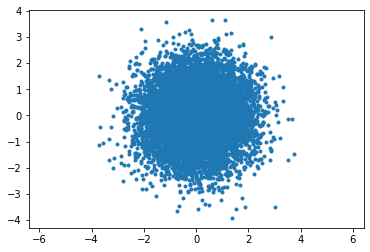

In [32]:
plt.plot(Z[0,:],Z[1,:],'.')
plt.axis('equal')
plt.show()

***
### Exercise 4  (Correlated normal random variables)
> Define in the cell below the correlation matrix
$$
\begin{align*}
	C = 
	\begin{bmatrix}
		1 & -0.7\\
		-0.7 & 1
	\end{bmatrix}.
\end{align*}
$$
Apply the Cholesky decomposition to obtain the lower trinagular matrix $L$. Compute matrix $Z1$ with two rows of correlated random variables using matrix $Z$ from above and the loading matrix $L$
$$
Z1 = L \cdot Z
$$
Compute covariance and correlation matrices, check that the correlation matrix is indeed $C$.

In [33]:
C = [[1,-0.7],[-0.7,1]]
L = np.linalg.cholesky(C)
N = 10000
Z = np.random.normal(size=(2,N)) 
Z1 = L @ Z
cov_z1 = (Z1[0,:] @ Z1[1,:])/(N-1)
corr_Z1 = np.corrcoef(Z1)
corr_z1 = cov_z1/np.std(Z1[0,:])/np.std(Z1[1,:])
print(cov_z1,corr_z1,corr_Z1)

-0.7031071513810253 -0.7022848772674403 [[ 1.         -0.70221299]
 [-0.70221299  1.        ]]


> Plot Z1[0,:] vs. Z1[1,:] and observe that the cloud becomes elongated. Feel free to play with positive and
negative correlations.

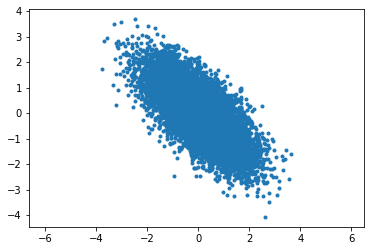

In [34]:
plt.plot(Z1[0,:],Z1[1,:],'.')
plt.axis('equal')
plt.show()

***
### Exercise 5 (Cholesky failure)
> Define correlation matrix
$$\begin{align*}
	C = 
	\begin{bmatrix}
		1 & 0.9 & -0.9\\
		0.9 & 1 & 0.95\\
		-0.9 & 0.95 & 1
	\end{bmatrix},
\end{align*}
$$
and try to apply the Cholesky decomposition. 

The algorithm to compute the Cholesky decomposition is very robust. If it fails it means that the matrix is not positive definite. Think in terms of correlations why the decomposition fails? Are all correlation matrices possible?

In [35]:
C = [[1, 0.9, -0.9], [0.9, 1, 0.95], [-0.9, 0.95, 1]]; # Create correlation matrix
try:
    L = np.linalg.cholesky(C)
except np.linalg.LinAlgError as err:
    print(err)

Matrix is not positive definite


## 3 Monte Carlo simulation of stochastic processes
### 3.1 Brownian motion generation
We start with generation of paths for Brownian motion $W(t)$. Remember that
$$\begin{align*}
	&W(0) = 0\\
	&\mathbb{E}\left[W(t) - W(s) \right] = 0\\
	&\text{var}\left[W(t) - W(s) \right] = t-s\\
	&\mathbb{E}\left[\left(W(t) - W(s)\right)\left(W(v) - W(u)\right) \right] = 0, \forall s \leq t\leq u \leq v
\end{align*}
$$

We simulate Brownian motion  on the interval $[0,T]$. For that we introduce a time grid as follows 
$\left\{t_0 = 0, t_1 = \Delta T,  t_2 = 2\Delta T,\ldots, t_M = M\Delta T = T\right\}$. At any time $t_i$ the value of the process for a single realization can be presented as 
$$\begin{align*}
	W(t_i) = \sum_{j=1}^i \left(W(t_j) - W(t_{j-1}) \right) 
	= \sum_{j=1}^i \Delta W(t_j) 
\end{align*}$$
Here $\Delta W(t_j)$ is a normal random variable 
$$
	Z_j \sim \mathcal{N}(0,\sqrt{\Delta T})
$$
with mean zero and standard deviation $\sqrt{\Delta T}$. Thus if $\left\{Z_j\right\}$ 
is a series of standard normal random numbers, we can generate a single realization for 
$W(t_i)$ as
$$
	W(t_i) = \sum_{j=1}^i\Delta W(t_j) = \sum_{j=1}^i Z_j \sqrt{\Delta T}.
$$
***
### Exercise 6 (Single path generation)
> Generate and plot a single path of Brownian motion on $[0, 1]$ interval. Try it a few times to see how it behaves from realization to realization.

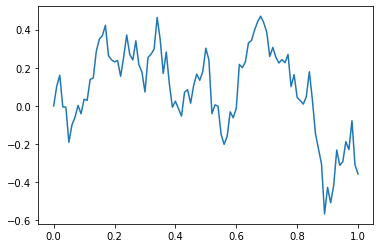

In [36]:
nstep = 100
T = 1.0   # maturity = 1Y
tgrid = np.linspace(0, T, nstep+1)
dT = T/nstep
W = np.zeros((nstep+1,1))
for i in range(0,nstep):
     Z = np.random.normal(size=1)
     dW = np.sqrt(dT) * Z ## Compute a one step increment
     W[i+1] = W[i] + dW ## Add it to the previous step.
        
plt.plot(tgrid,W)     
plt.show()

***
### Exercise 7 (Multiple paths generation)
Suppose we want to compute an expectation of some function of Brownian motion at time $T$. We need to generate multiple paths to that point in time. Select the values at the very last step and take an expectation of those values.

In order to generate multiple paths with multiple steps, we need to loop over time steps and over different paths. Or we can use the Numpy matrix functionality to simplify the code and to speed up the calculations. There are different ways but the most efficient and transparent way is to generate a vector of increments for $N$ paths on every time step and loop over the time steps as shown below.

In [37]:
nstep = 100
npath = 1000
T = 1.0   # maturity = 1Y
tgrid = np.linspace(0, T, nstep+1)
dT = T/nstep
W = np.zeros((nstep+1,npath))
for i in range(0,nstep):
    Z = np.random.normal(size=npath)
    dW = np.sqrt(dT) * Z
    W[i+1,:] = W[i,:] + dW
    
WT = W[-1,:] # Values at time T

Let us plot the paths to visualize them. You can do it in one go. Observe a square root divergence of the paths.

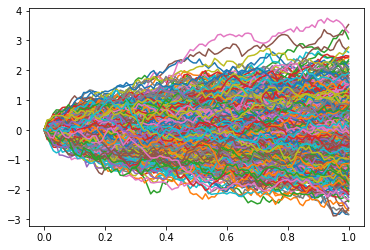

In [38]:
plt.plot(tgrid,W)
plt.show()

> Verify that the Brownian motion $W(T)$ at time $T=1$ has indeed zero mean, standard deviation of 1, and zero excess kurtosis and skew.

In [39]:
mW = np.mean(WT) ## Mean
stdW = np.std(WT) ## standard deviation
eW = stats.kurtosis(WT) ## Excess kurtosis, normal distribution has excess kurtosis = 0.
skewW = stats.skew(WT) ## Skewness
print(mW,stdW,eW,skewW)

0.03793679572655327 0.980321659378646 0.025102879475020767 -0.017651579383027145


> Plot the empirical distribution of $W(T)$ at time $T$ and compare it to the normal pdf.

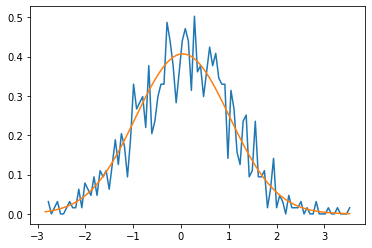

In [40]:
y, x = np.histogram(WT, 100) # Histogram
plt.plot(x[1:],y/npath/(x[1]-x[0]))
yn = stats.norm.pdf(x,loc=mW,scale=stdW) # normal pdf
plt.plot(x,yn)
plt.show()

***
### Exercise 8 ($dW^2 = dt$ and $dW_1dW_2 = 0$)
A surprising feature of the Ito calculus is that $dW^2 = dt$. Let us verify this empirically. 

Show numerically that the following relations are satisfied
$$\begin{align*}
& I_1(t) = \int_0^t dW^2 = t\\
& I_2(t) = \int_0^t dW_1dW_2 = 0
\end{align*}$$
For this, approximate integrals $I_1$ and $I_2$ by sums, respectively,
$$\begin{align*}
& S_1(t_i) = \sum_{j=1}^i \Delta W(t_j)^2 \\
& S_2(t_i) = \sum_{j=1}^i \Delta W_1(t_j)\Delta W_2(t_j)
\end{align*}$$
Here $\Delta W_{1,2}(t_j)$ are independent normally distributed increments. 

> Simulate 10 paths of Brownian motion $W(t)$ on the time interval [0,1] with different number of time steps $N$: $2, 20, 200, \dots, 2\cdot10^5$. Compute quadratic increments the Brownian increments $\Delta W(t_j)^2$ and $\Delta W_1(t_j)\Delta W_2(t_j)$ and calculate cumulative sums $S_1$ and $S_2$.
>
>Plot the paths for $S_1$ and $S_2$ for each number of steps $N$. See if the paths for $S_i$ converge to $S_1(t_i) = t_i$ and $S_2(t_i) = 0$, respectively.

2


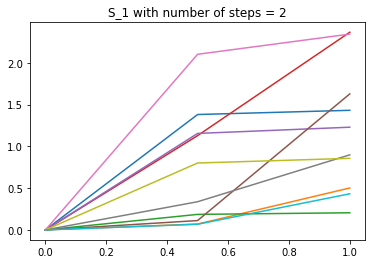

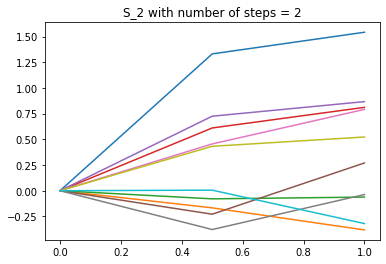

20


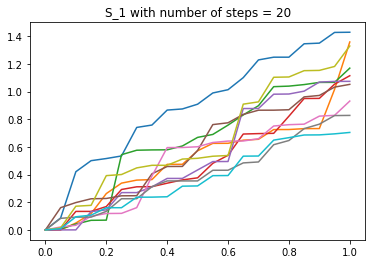

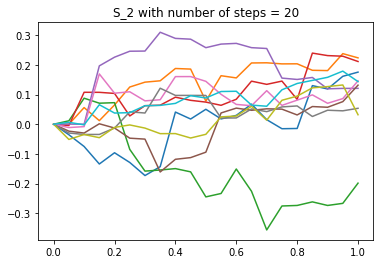

200


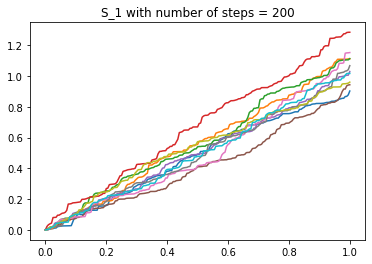

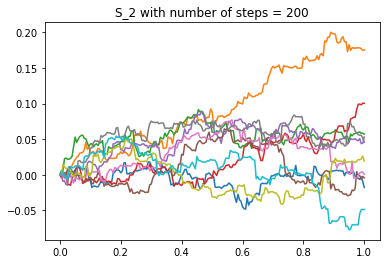

2000


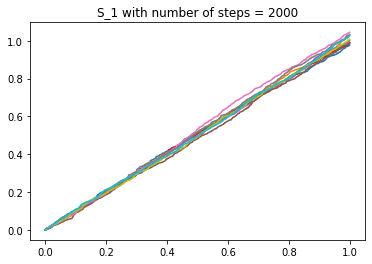

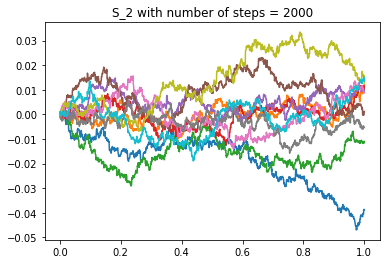

20000


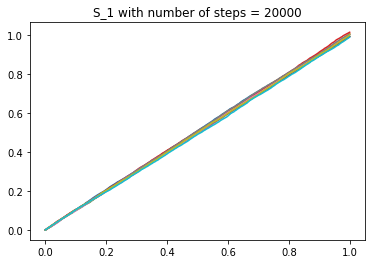

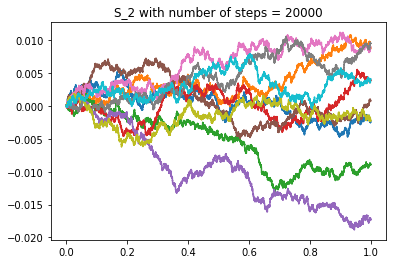

In [45]:
T = 1.0
npath = 10
for logstep in range(0,5):
    nstep = 2*10**logstep
    tgrid = np.linspace(0, T, nstep+1)
    dT = T/nstep
    S1 = np.zeros((nstep+1,npath))
    S2 = np.zeros((nstep+1,npath))
    for i in range(0,nstep):
        Z1 = np.random.normal(size=npath)
        Z2 = np.random.normal(size=npath)
        S1[i+1,:] = S1[i,:] + (np.sqrt(dT) * Z1)**2
        S2[i+1,:] = S2[i,:] + (np.sqrt(dT) * Z1) * (np.sqrt(dT) * Z2)

    plt.plot(tgrid,S1)
    plt.title('S_1 with number of steps = %d'%nstep)
    plt.show()
    plt.plot(tgrid,S2)
    plt.title('S_2 with number of steps = %d'%nstep)
    plt.show()

### 3.2 Ito lemma
GBM is described by the following stochastic differential equation (SDE):
$$\begin{align*}
dS(t) & = rS(t)dt + \sigma S(t) dW_t\\
S(0) & = S_0
\end{align*}$$
or by the discrete-time approximation
$$\begin{align*}
S(t_{i+1}) = S(t_{i}) + rS(t_{i})(t_{i+1} - t_{i}) + \sigma S(t_{i})(W_{i+1} - W_{i})
\end{align*}$$
Using Ito's lemma the equation can be written as
$$\begin{align*}
d\ln(S_t) = \left(r - \frac{\sigma^2}{2}\right)dt + \sigma dW_t
\end{align*}$$
or in the discrete-time form
$$\begin{align*}
s(t_{i+1}) = \ln S(t_{i+1}) = \ln S(t_{i}) + \left(r - \frac{\sigma^2}{2}\right)(t_{i+1} - t_{i}) + \sigma (W_{i+1} - W_{i})
\end{align*}$$
Observe the additional term $\sigma^2/2$ in the drift. 

The way how the (continuous) SDE is discretized above is called _Euler scheme_. There are also other discretization schemes which provide a better convergence for specific SDE types.
***
### Exercise 9 (Prove numerically Ito's lemma)
> Simulate $S(t_i)$ and $s(t_i)$.

> 1. Show that the distributions of $S(t_N)$ and $\hat{S}(t_N) = \exp\{s(t_N)\}$ are the same.
> 2. Compute log-returns, $\ln X(t_N)/X(t_0)$, for both processes, $S(t_i)$ and $\hat{S}(t_i)$ and show that they both have the same _normal_ distribution.

You can use the following parameters for the model:
$$\begin{align*}
& S_0 = 1 \\
& r = 0 \\
& \sigma = 0.2
\end{align*}$$
You can also plot paths for $S(t_i)$ and $exp(s(t_i))$ as a function of time and observe that they are close but there is a difference. Simulation of $\ln S$ is exact in this case, while simulation of $S(t_i)$ converges to $exp(s(t_i))$ only for small time steps.
> 3. Plot log-returns as a function of time for a single path. Take 1000 time steps to obtain a dense path. The volatility is pretty constant visually as one can expect. 

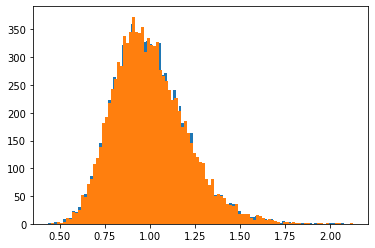

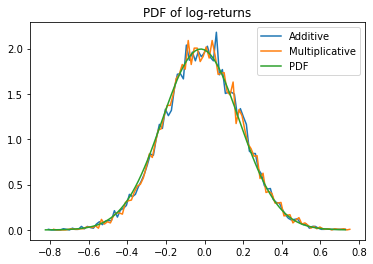

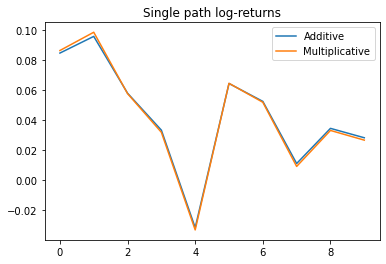

In [42]:
r = 0.00
v = 0.2
T = 1.
npath = 10000
nstep = 10
dt = T/nstep
S0 = 1.
Sa = S0*np.ones((nstep+1,npath))
Sm = S0*np.ones((nstep+1,npath))
lnSm = np.log(Sm)
for i in range(0,nstep):
    Z = np.random.normal(size=npath)
    dSa = r*Sa[i,:]*dt + v*np.sqrt(dt)*Sa[i,:]*Z
    Sa[i+1,:] = Sa[i,:] + dSa
    dSm = (r - v**2/2.)*dt + v*np.sqrt(dt)*Z
    lnSm[i+1,:] = lnSm[i,:] + dSm

Sm = np.exp(lnSm)
Fa = np.mean(Sa)
Fm = np.mean(Sm)

plt.hist(Sa[-1,:], 100)
plt.hist(Sm[-1,:], 100)
plt.show()

lnSaT = np.log(Sa[-1,:])
lnSmT = lnSm[-1,:];
ya, xa = np.histogram(lnSaT, 100)
ym, xm = np.histogram(lnSmT, 100)
mGBM = np.mean(lnSaT)
sGBM = np.std(lnSaT)
yn = stats.norm.pdf(xa,loc=mGBM,scale=sGBM)
plt.plot(xa[1:],ya/npath/(xa[1]-xa[0]), label='Additive')
plt.plot(xm[1:],ym/npath/(xm[1]-xm[0]), label='Multiplicative')
plt.plot(xa,yn, label='PDF')
plt.legend()
plt.title('PDF of log-returns')
plt.show()

plt.plot(np.diff(np.log(Sa[:,0])), label='Additive')
plt.plot(np.diff(np.log(Sm[:,0])), label='Multiplicative')
plt.legend()
plt.title('Single path log-returns')
plt.show()

### 3.3 Other stochastic processes
GBM model predicts log-normal returns as we could see in the previous exercise. This is typically not the case in practice. Look at the log-returns of DAX index and observe the volatility clustering, i.e. splitting in regions where volatility is low and regions where it is high.
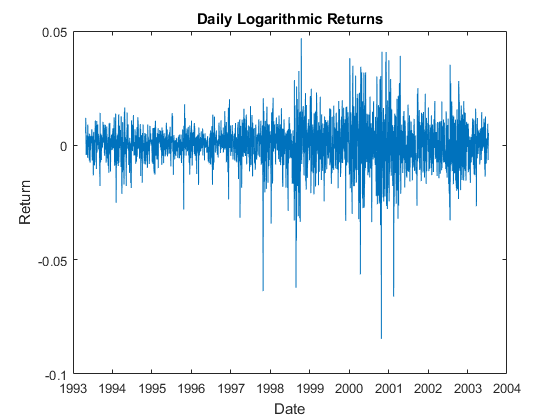

This indicates that the volatility does not stay constant in time.
To account for that more sophisticated models are used. One class of them is called _stochastic volatility models._ There are different way to introduce stochastic volatility. Two very popular models are Heston and SABR. The first is popular in the equity derivatives, the second in the interest rate derivatives.
### Heston model
Heston model has a mean reverting variance, $\nu(t)$. The process for stock value $S$ and variance $\nu$ are given by the following SDE.
$$\begin{align*}
dS(t) &= rS(t)dt + \sqrt{\nu(t)}S(t)dW_1(t)\\
d\nu(t) &= \varkappa(\vartheta - \nu(t))dt + \xi \sqrt{\nu(t)}dW_2(t)\\
\left\langle dW_1,dW_2 \right\rangle &= \rho dt\\
S(0) & = S_0\\
\nu(0) & = \nu_0 
\end{align*}$$
Here $r$ is a risk-free rate, $\varkappa$ is a speed of mean reversion, $\vartheta$ is a long term variance, and $\xi$ is a volatility of volatility, all constant parameters. Brownian motions $W_1$ and $W_2$ are correlated with correlation $\rho$. You can see that the equation for $S$ resembles Geometric Brownian Motion, but with stochastic volatility $\sigma(t) = \sqrt{\nu(t)}$. Variance $\nu(t)$ follows a square root mean-reverting process.
### SABR model
The stochastic $\alpha$, $\beta$, $\rho$ (SABR) model is given by the following SDE
$$\begin{align*}
dF(t) &= \sigma(t)F(t)^{\beta}dW_1(t)\\
d\sigma(t) &= \alpha \sigma(t) dW_2(t)\\
\left\langle dW_1,dW_2 \right\rangle &= \rho dt\\
F(0) & = F_0\\
\sigma(0) & = \sigma_0 
\end{align*}$$
Here $F$ is a forward rate, usually defined in case of stock as $F(t) = F(t,T) = Se^{r(T-t)}$. Forward rate is a rate at which two parties agree to buy/sell stock at a future time $T$.
Further, $\alpha$ is a volatility of volatility, and $\beta$ is some power of Forward rate that controls the skewness of return. Brownian motions are again correlated. 
***
### Exercise 10 (Stochastic volatility)
> Choose one of the models, Heston or SABR. Simulate the paths to maturity $T = 1$ year. 
> 1. Plot a single path and look if you can observe a volatility clustering.
> 2. Plot histograms of log-returns and compare them to the normal distribution with the same mean and variance. Observe the skewness and fat tails.
> As initial parameters for the model choose the following:
$$\begin{align*}
& \text{Heston} & \text{SABR}\\
& S_0 = 1 & F_0 = 1\\
& r = 0 & r = 0\\
& \nu_0 = 0.2^2 & \sigma_0 = 0.2 \\
& \vartheta = \nu_0 & \beta = 1 \\
& \rho = -0.7 & \rho = -0.7\\
& \xi = 0.5 & \alpha = 0.5\\
& \varkappa = 1 & 
\end{align*}$$

> ### SABR

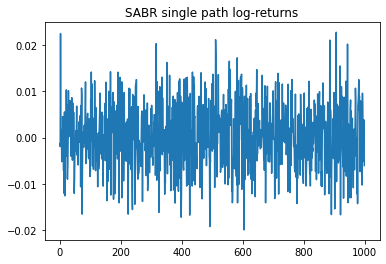

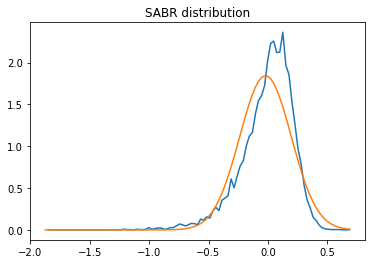

In [43]:
#%% SABR
r = 0.00
F0 = 1.0
A0 = 0.2
T = 1.
S0 = F0*np.exp(-r*T)
beta = 1
rho = -0.7
alpha = 0.5
npath = 10000
nstep = 1000
dt = T/nstep
CH = [[1.0, rho],[rho, 1]]
L = np.linalg.cholesky(CH)
F = F0*np.ones((nstep+1,npath))
A = A0*np.ones((nstep+1,npath))
for i in range(0,nstep):
    ZH = np.random.normal(size=(2,npath//2))
    z = np.c_[ZH,-ZH] # antithetic sampling
    Z = L @ z
    dF = A[i,:]* np.power(F[i,:],beta) * np.sqrt(dt) * Z[0,:]
    F[i+1,:] = F[i,:] + dF
    dA = alpha * A[i,:] * np.sqrt(dt) * Z[1,:]
    A[i+1,:] = np.maximum(A[i,:] + dA,0)

plt.plot(np.diff(np.log(F[:,0])))
plt.title('SABR single path log-returns')
plt.show()

lnFT = np.log(F[-1,:])
y, x = np.histogram(lnFT,100)
mS = np.mean(lnFT)
sS = np.std(lnFT)
yn = stats.norm.pdf(x,loc=mS,scale=sS)
plt.plot(x[1:],y/npath/(x[1]-x[0]))
plt.plot(x,yn)
plt.title('SABR distribution')
plt.show()

> ### Heston

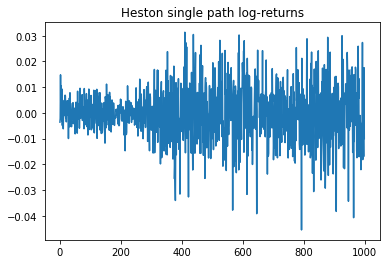

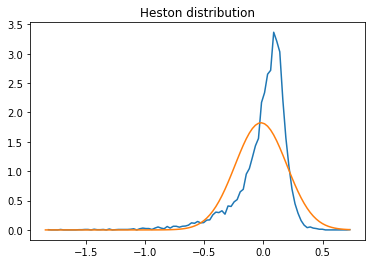

In [44]:
#%% Heston
r = 0.00
S0 = 1.0
V0 = 0.2**2
T = 1.
kappa = 1.
theta = V0
xi = 0.5
rho = -0.7
npath = 10000
nstep = 1000
dt = T/nstep
C = [[1.0, rho],[rho, 1.0]]
L = np.linalg.cholesky(C)
S = S0*np.ones((nstep+1,npath))
V = V0*np.ones((nstep+1,npath))

for i in range(0,nstep):
    ZH = np.random.normal(size=(2,npath//2))
    z = np.c_[ZH,-ZH] # antithetic sampling    
    Z = L @ z
    dS = r*S[i,:]*dt + np.sqrt(V[i,:]) * S[i,:] * np.sqrt(dt) * Z[0,:]
    S[i+1,:] = S[i,:] + dS
    dV = kappa*(theta - V[i,:])*dt + xi * np.sqrt(V[i,:]) * np.sqrt(dt) * Z[1,:]
    V[i+1,:] = np.maximum(V[i,:] + dV,0)  # to avoid negative vols
    
plt.plot(np.diff(np.log(S[:,0])))
plt.title('Heston single path log-returns')
plt.show()

lnST = np.log(S[-1,:])
y, x = np.histogram(lnST,100)
mH = np.mean(lnST)
sH = np.std(lnST)
yn = stats.norm.pdf(x,loc=mH,scale=sH)
plt.plot(x[1:],y/npath/(x[1]-x[0]))
plt.plot(x,yn)
plt.title('Heston distribution')
plt.show()